In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sbn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical


In [ ]:
def load_images(folder):
  train_data = []
  for label in os.listdir(folder):
    print(label, " Started!")
    path = folder+'/'+label
    for img in os.listdir(path):
      img = cv2.imread(path+'/'+img, cv2.IMREAD_GRAYSCALE)
      new_img = cv2.resize(img, (100, 100))
      if new_img is not None:
        train_data.append([new_img, label])
    print(label, " ended!")
  return train_data


In [ ]:
train_dir = '../data/train'
val_dir = '../data/test'

train_data = load_images(train_dir)
test_data = load_images(val_dir)


0  Started!
0  ended!
1  Started!
1  ended!
2  Started!
2  ended!
3  Started!
3  ended!
4  Started!
4  ended!
5  Started!
5  ended!
6  Started!
6  ended!
7  Started!
7  ended!
8  Started!
8  ended!
9  Started!
9  ended!
a  Started!
a  ended!
b  Started!
b  ended!
c  Started!
c  ended!
d  Started!
d  ended!
e  Started!
e  ended!
f  Started!
f  ended!
g  Started!
g  ended!
h  Started!
h  ended!
i  Started!
i  ended!
j  Started!
j  ended!
k  Started!
k  ended!
l  Started!
l  ended!
m  Started!
m  ended!
n  Started!
n  ended!
o  Started!
o  ended!
p  Started!
p  ended!
q  Started!
q  ended!
r  Started!
r  ended!
s  Started!
s  ended!
t  Started!
t  ended!
u  Started!
u  ended!
v  Started!
v  ended!
w  Started!
w  ended!
x  Started!
x  ended!
y  Started!
y  ended!
z  Started!
z  ended!
0  Started!
0  ended!
1  Started!
1  ended!
2  Started!
2  ended!
3  Started!
3  ended!
4  Started!
4  ended!
5  Started!
5  ended!
6  Started!
6  ended!
7  Started!
7  ended!
8  Started!
8  ended!
9  Started

In [4]:
train_images=[]
train_labels=[]
test_images=[]
test_labels=[]

In [5]:
for feature, label in train_data:
  train_images.append(feature)
  train_labels.append(label)

for feature, label in test_data:
  test_images.append(feature)
  test_labels.append(label)


In [6]:
train_images=np.array(train_images)
test_images=np.array(test_images)

In [7]:
train_images=train_images.reshape((-1,100,100,1))
test_images=test_images.reshape((-1,100,100,1))

In [8]:
train_images.shape
# test_images.shape


(28800, 100, 100, 1)

In [9]:
train_images= train_images.astype('float32')
test_images = test_images.astype('float32')

train_images=train_images/255.0
test_images=test_images/255.0

In [10]:
le = LabelEncoder()
le.fit_transform(train_labels)
le.fit_transform(test_labels)
train_labels_label_encoded = le.transform(train_labels)
test_labels_label_encoded = le.transform(test_labels)

In [11]:
test_labels_label_encoded

array([ 0,  0,  0, ..., 35, 35, 35])

In [12]:
train_labels_one_hot = to_categorical(train_labels_label_encoded)
test_labels_one_hot = to_categorical(test_labels_label_encoded)

In [13]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ',
      train_labels_one_hot[0])
print(test_labels_one_hot.shape)


Original label 0 :  0
After conversion to categorical ( one-hot ) :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(7236, 36)


In [14]:
input_shape=(100,100,1)
n_classes=36

In [15]:
def create_model():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same',
              activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    return model


In [16]:
model = create_model()
batch_size = 256
epochs = 10
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model)

In [17]:
history = model.fit(train_images, train_labels_one_hot, batch_size=batch_size,
                    epochs=epochs, verbose=1, validation_data=(test_images, test_labels_one_hot))
model.evaluate(test_images, test_labels_one_hot)


Epoch 1/10
113/113 [==============================] - 24s 165ms/step - loss: 1.2094 - accuracy: 0.6577 - val_loss: 0.0670 - val_accuracy: 0.9802
Epoch 2/10
113/113 [==============================] - 16s 145ms/step - loss: 0.1504 - accuracy: 0.9504 - val_loss: 0.0199 - val_accuracy: 0.9952
Epoch 3/10
113/113 [==============================] - 16s 145ms/step - loss: 0.0741 - accuracy: 0.9750 - val_loss: 0.0069 - val_accuracy: 0.9974
Epoch 4/10
113/113 [==============================] - 16s 146ms/step - loss: 0.0489 - accuracy: 0.9844 - val_loss: 0.0068 - val_accuracy: 0.9975
Epoch 5/10
113/113 [==============================] - 17s 148ms/step - loss: 0.0415 - accuracy: 0.9862 - val_loss: 0.0048 - val_accuracy: 0.9985
Epoch 6/10
113/113 [==============================] - 17s 152ms/step - loss: 0.0307 - accuracy: 0.9898 - val_loss: 0.0028 - val_accuracy: 0.9990
Epoch 7/10
113/113 [==============================] - 17s 153ms/step - loss: 0.0275 - accuracy: 0.9906 - val_loss: 0.0016 - val_ac

[0.00214682100340724, 0.999447226524353]

In [18]:
model_json = model.to_json()
with open("model_new.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
model.save_weights('model_updated.weights.h5')
print('Weights saved')
model.save('model.keras')

Model Saved
Weights saved


Visualizing loss

Text(0.5, 1.0, 'Loss Curves')

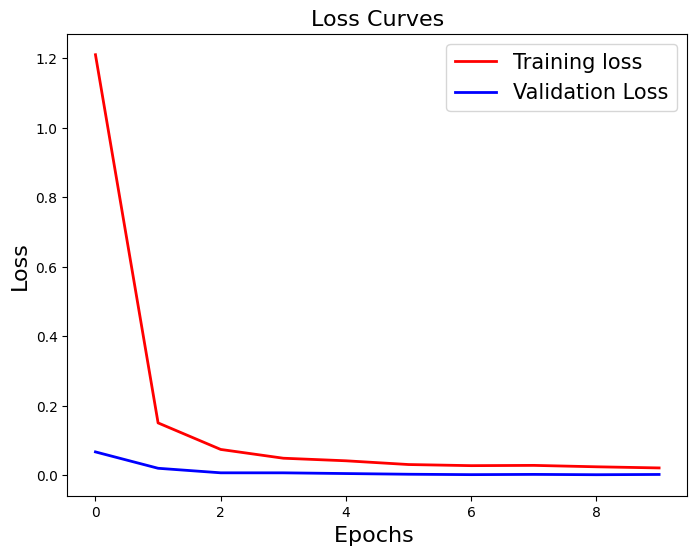

In [19]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'], 'r', linewidth=2.0)
plt.plot(history.history['val_loss'], 'b', linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=15)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)


Visualizing accuracy

Text(0.5, 1.0, 'Accuracy Curves')

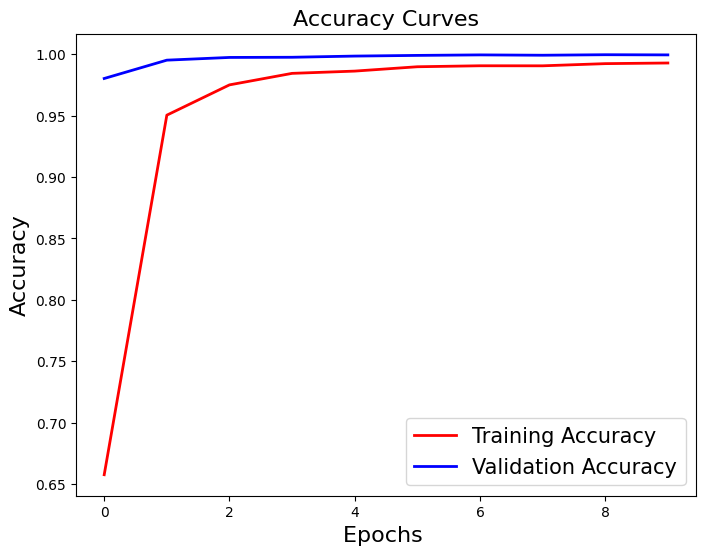

In [20]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['accuracy'], 'r', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=15)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

In [21]:
import pickle

with open('model.pkl', 'wb') as files:
    pickle.dump(model, files)


INFO:tensorflow:Assets written to: ram://c58fc57e-5c48-438c-9e43-032a25c3b4b4/assets


INFO:tensorflow:Assets written to: ram://c58fc57e-5c48-438c-9e43-032a25c3b4b4/assets


In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [23]:
y_pred = model.predict(X_test)

ValueError: in user code:

    File "C:\Users\anjuv\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\anjuv\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\anjuv\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\anjuv\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\anjuv\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\anjuv\AppData\Roaming\Python\Python310\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 100, 100, 1), found shape=(None, 28, 28)


In [ ]:
c_m = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

plt.figure(figsize=(20, 17))
plt.title("Confusion Matrix for CNN")
df_cm = pd.DataFrame(c_m)
sbn.heatmap(df_cm, annot=True)

In [ ]:
plt.savefig('confusion.png')